## Predicting housing prices with linear regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
houses_df = pd.read_csv('housing_price_regression.csv')

### Dataset consists of 2051 homes, 5 features, and target

In [3]:
houses_df = houses_df[['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Garage Area', 
                       'Mas Vnr Area', 'SalePrice', 'target']]

In [4]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
Overall Qual    2051 non-null int64
Overall Cond    2051 non-null int64
Gr Liv Area     2051 non-null int64
Garage Area     2051 non-null float64
Mas Vnr Area    2051 non-null float64
SalePrice       2051 non-null int64
target          2051 non-null int64
dtypes: float64(2), int64(5)
memory usage: 112.3 KB


In [5]:
houses_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,5.562165,1.104497,1.0,5.0,5.0,6.0,9.0
Gr Liv Area,2051.0,1499.330083,500.447829,334.0,1129.0,1444.0,1728.5,5642.0
Garage Area,2051.0,473.440761,216.135102,0.0,319.0,480.0,576.0,1418.0
Mas Vnr Area,2051.0,98.626524,174.324690,0.0,0.0,0.0,159.0,1600.0
SalePrice,2051.0,181469.701609,79258.659352,12789.0,129825.0,162500.0,214000.0,611657.0
target,2051.0,181469.701609,79258.659352,12789.0,129825.0,162500.0,214000.0,611657.0


### Target is price

In [6]:
houses_df['SalePrice'].head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [7]:
y = houses_df['SalePrice']
X = houses_df.drop(columns=['SalePrice', 'target'])

### Train/test split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
#predictions = {}
r2_train_mean = []
r2_test_mean = []


for test_size in np.linspace(.01, .99, 20):
    r2_train = []
    r2_test = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    lasso = LassoCV(cv = 5)
    lasso.fit(X_train_sc, y_train)

    r2_train.append(lasso.score(X_train_sc, y_train))
    r2_test.append(lasso.score(X_test_sc, y_test))
    
    r2_train_mean.append(np.mean(r2_train))
    r2_test_mean.append(np.mean(r2_test))
    #predictions[test_size] = lasso.predict(X_test)

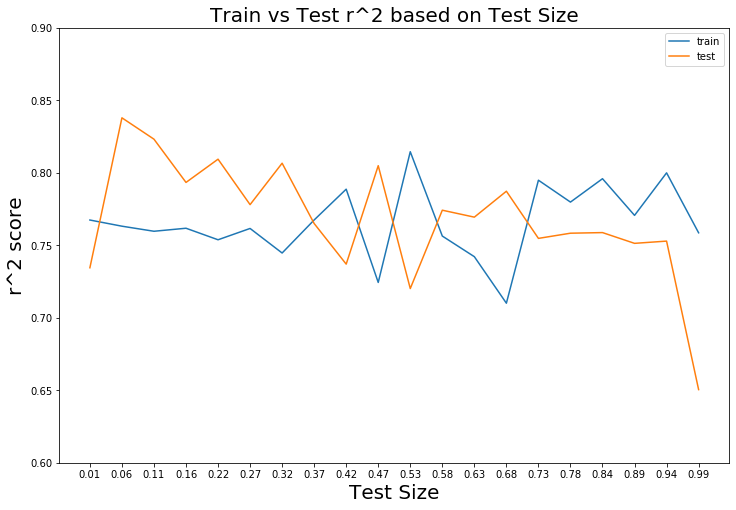

In [10]:
plt.figure(figsize = (12,8))
plt.title('Train vs Test r^2 based on Test Size', fontsize = 20)
plt.xticks(ticks = range(0,20), labels =  np.round(np.linspace(.01,.99,20), 2))
plt.xlabel('Test Size', fontsize = 20)
plt.ylabel('r^2 score', fontsize = 20)
plt.ylim([.6, .9])
plt.plot(r2_train_mean)
plt.plot(r2_test_mean)
plt.legend(labels = ['train', 'test']);

### Let's try with a smaller dataset

In [11]:
small_house_df = houses_df.sample(frac = .05)

In [12]:
small_house_df.shape

(103, 7)

In [13]:
y_small = houses_df['SalePrice']
X_small = houses_df.drop(columns=['SalePrice', 'target'])

In [14]:
#predictions = {}
r2_train_mean = []
r2_test_mean = []


for test_size in np.linspace(.01, .99, 20):
    r2_train = []
    r2_test = []
    
    X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size = test_size)

    ss = StandardScaler()
    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)

    lasso = LassoCV(cv = 5)
    lasso.fit(X_train_sc, y_train)

    r2_train.append(lasso.score(X_train_sc, y_train))
    r2_test.append(lasso.score(X_test_sc, y_test))
    
    r2_train_mean.append(np.mean(r2_train))
    r2_test_mean.append(np.mean(r2_test))
    #predictions[test_size] = lasso.predict(X_test)

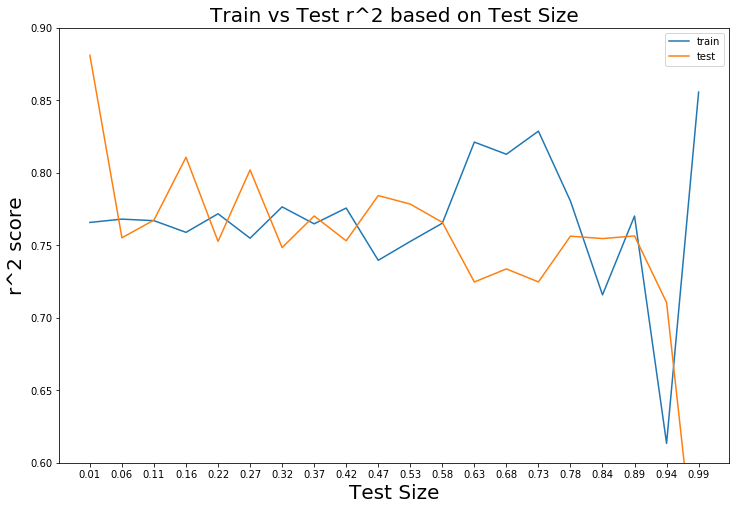

In [15]:
plt.figure(figsize = (12,8))
plt.title('Train vs Test r^2 based on Test Size', fontsize = 20)
plt.xticks(ticks = range(0,20), labels =  np.round(np.linspace(.01,.99,20), 2))
plt.xlabel('Test Size', fontsize = 20)
plt.ylabel('r^2 score', fontsize = 20)
plt.ylim([.6, .9])
plt.plot(r2_train_mean)
plt.plot(r2_test_mean)
plt.legend(labels = ['train', 'test']);

### Bring back dataset and use cross_validate

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [20]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [21]:
lasso = Lasso()

In [22]:
all_accuracies = cross_val_score(estimator = lasso, X = X_train, y = y_train, cv = 10, n_jobs = -1)

In [23]:
all_accuracies

array([0.81089704, 0.78289057, 0.7340133 , 0.77349716, 0.76393027,
       0.80909877, 0.82207781, 0.70201183, 0.53832237, 0.7218034 ])

In [24]:
all_accuracies.mean()

0.7458542523023043

In [25]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
lasso.score(X_test, y_test)

0.801801115716231

In [27]:
from sklearn.model_selection import cross_validate

all_scores = cross_validate(estimator = lasso, X = X_train, y = y_train, 
                            cv = 10, n_jobs = -1, scoring = ['r2'])

all_scores

{'fit_time': array([0.08227897, 0.02850413, 0.00680184, 0.00879383, 0.00834799,
        0.00820804, 0.00713801, 0.00732303, 0.00736475, 0.0069418 ]),
 'score_time': array([0.00512409, 0.00281382, 0.00329232, 0.00367117, 0.00453091,
        0.00397515, 0.00856781, 0.0052278 , 0.00311923, 0.00557113]),
 'test_r2': array([0.81089704, 0.78289057, 0.7340133 , 0.77349716, 0.76393027,
        0.80909877, 0.82207781, 0.70201183, 0.53832237, 0.7218034 ])}

### Gridsearch

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {
    'alpha': [.1, .5, 1, 2, 5, 10, 20, 100, 200, 1000, 5000],
    'tol': [.001, .01, .1, 1, 10],
    'max_iter' : [5, 10, 50, 100]
}

In [30]:
gs = GridSearchCV(estimator = lasso, param_grid = param_grid)

In [31]:
gs.fit(X_train_sc, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988097762091.2642, tolerance: 7781330671.215108
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979830489221.2838, tolerance: 8033753040.487227
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 965832225922.4166, tolerance: 7607085494.053605
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 895472773406

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 983152809601.3938, tolerance: 7781330671.215108
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 974875649875.9463, tolerance: 8033753040.487227
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 960620635713.6725, tolerance: 7607085494.053605
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 889181685132

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 960990165371.763, tolerance: 7781330671.215108
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 952683675839.2771, tolerance: 8033753040.487227
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 937253274523.8583, tolerance: 7607085494.053605
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 860938654108.

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 875175355824.5658, tolerance: 7781330671.215108
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 866987003835.4192, tolerance: 8033753040.487227
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 846637693156.3544, tolerance: 7607085494.053605
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750950606160

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65427742808.42822, tolerance: 7781330671.215108
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48337903767.84473, tolerance: 8033753040.487227
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15679518342.380615, tolerance: 7607085494.053605
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45847101938

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10, 20, 100, 200, 1000,
                                   5000],
                         'max_iter': [5, 10, 50, 100],
                         'tol': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
gs.score(X_test_sc, y_test)

0.7996309623797357

In [33]:
gs.best_params_

{'alpha': 1000, 'max_iter': 10, 'tol': 0.001}

In [34]:
gs.cv_results_

{'mean_fit_time': array([0.00311551, 0.00163999, 0.00259423, 0.00109591, 0.00104675,
        0.00152779, 0.00157967, 0.00158072, 0.00133915, 0.0014811 ,
        0.00148692, 0.00120935, 0.00110588, 0.00103965, 0.00165911,
        0.00223861, 0.00152793, 0.00148363, 0.00249119, 0.00312119,
        0.00245681, 0.00166945, 0.00222421, 0.00118442, 0.00104489,
        0.00160961, 0.00157361, 0.00156894, 0.00107098, 0.00101018,
        0.00111132, 0.00122976, 0.00133195, 0.00109634, 0.00149899,
        0.0015841 , 0.00126796, 0.001122  , 0.00100851, 0.00099096,
        0.00160975, 0.00154066, 0.00170889, 0.00110416, 0.0011301 ,
        0.00157976, 0.00159817, 0.00131655, 0.00101929, 0.0011178 ,
        0.00111485, 0.00118475, 0.00124049, 0.00107574, 0.00104103,
        0.00110531, 0.00183144, 0.00233397, 0.00246797, 0.00169592,
        0.00216064, 0.00229115, 0.00243602, 0.00161223, 0.00190706,
        0.00182533, 0.00405321, 0.00332828, 0.00144038, 0.00108232,
        0.00195389, 0.00249543,

In [35]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003116,0.002087,0.001244,0.000150,0.1,5,0.001,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.001}",0.794065,0.755398,0.791369,0.756990,0.628623,0.745289,0.060585,101
1,0.001640,0.000430,0.000946,0.000175,0.1,5,0.01,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.01}",0.794065,0.755398,0.791369,0.756990,0.628623,0.745289,0.060585,101
2,0.002594,0.000808,0.001089,0.000266,0.1,5,0.1,"{'alpha': 0.1, 'max_iter': 5, 'tol': 0.1}",0.794065,0.755398,0.791369,0.756990,0.628623,0.745289,0.060585,101
3,0.001096,0.000186,0.000739,0.000023,0.1,5,1,"{'alpha': 0.1, 'max_iter': 5, 'tol': 1}",0.781258,0.749936,0.779746,0.747748,0.603806,0.732499,0.065891,173
4,0.001047,0.000080,0.000747,0.000032,0.1,5,10,"{'alpha': 0.1, 'max_iter': 5, 'tol': 10}",0.730851,0.697933,0.724306,0.715590,0.553890,0.684514,0.066240,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.001051,0.000028,0.000746,0.000033,5000,100,0.001,"{'alpha': 5000, 'max_iter': 100, 'tol': 0.001}",0.771755,0.747770,0.781818,0.749065,0.651620,0.740406,0.046281,130
216,0.001074,0.000054,0.000745,0.000021,5000,100,0.01,"{'alpha': 5000, 'max_iter': 100, 'tol': 0.01}",0.772017,0.747813,0.781871,0.749011,0.651413,0.740425,0.046405,127
217,0.001036,0.000029,0.000837,0.000141,5000,100,0.1,"{'alpha': 5000, 'max_iter': 100, 'tol': 0.1}",0.773572,0.750173,0.783734,0.749383,0.649148,0.741202,0.047913,121
218,0.001826,0.000648,0.000992,0.000152,5000,100,1,"{'alpha': 5000, 'max_iter': 100, 'tol': 1}",0.768521,0.751219,0.782801,0.746440,0.633094,0.736415,0.053249,133


### Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
pca = PCA()
knn = KNeighborsRegressor()

In [ ]:
pipe = Pipeline(steps = [('scaler', scaler), ('pca', pca), ('knn', knn)])

In [ ]:
param_grid = {
    'pca__n_components' : [2, 3, 4, 5],
    'knn__algorithm' : ['auto', 'ball_tree', 'brute', 'kd_tree'],
    'knn__n_neighbors' : [5, 9, 11, 13, 15, 17, 21, 25, 29],
    'knn__weights' : ['uniform', 'distance']
}

In [ ]:
gs_pipe = GridSearchCV(pipe, param_grid, cv = 5, scoring='r2')

In [ ]:
gs_pipe.fit(X_train, y_train)

In [ ]:
gs_pipe.score(X_test, y_test)